# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [472]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [474]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [476]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [478]:
# Try loading one file

df = pd.read_parquet("trip_records/2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [480]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = [file for file in os.listdir() if file.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
          daily_data = monthly_data[monthly_data['date'] == date]
          # Iterate through each hour of the selected date
          for hour in daily_data['hour'].unique():
            hourly_data = daily_data[daily_data['hour'] == hour]
            # Sample 5% of the hourly data randomly
            sample = hourly_data.sample(frac=0.05, random_state=42)
            # Append the sampled data to the current date's dataframe
            # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, sample])

        # Append the sampled data of this date to the final dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


os.chdir('..')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [482]:
# Restricting the total entries to 300000
df= df.sample(n=300000, random_state=42)
# Store the df in csv/parquet
df.to_parquet("sampled_records")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet("sampled_records")

In [ ]:
df.head()

In [ ]:
df.info()

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [484]:
# Fix the index and drop any columns that are not needed
df.drop(columns=['date'],inplace= True)
df.drop(columns = ["store_and_fwd_flag"],inplace= True)
df.drop(columns=['hour'],inplace= True)
df.reset_index(inplace = True, drop = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [486]:
# Combine the two airport fee columns

df["Airport_fee"] = df["Airport_fee"].fillna(df["airport_fee"])
df = df.drop(columns = ["airport_fee"])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [488]:
# check where values of fare amount are negative

df[df["fare_amount"] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [490]:
# Analyse RatecodeID for the negative fare amounts

df[df["fare_amount"] < 0].RatecodeID.value_counts(dropna=False)

Series([], Name: count, dtype: int64)

In [492]:
# Find which columns have negative values

number_cols = df.select_dtypes(include=['number'])
negative_cols = number_cols.columns[(number_cols < 0).any()].tolist()
df[negative_cols].lt(0).sum()

extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      8
Airport_fee               2
dtype: int64

In [496]:
# fix these negative values
df = df[(df["extra"] >= 0) | df["extra"].isna()]
df = df[(df["mta_tax"] >= 0) | df["mta_tax"].isna()]
df = df[(df["improvement_surcharge"] >= 0) | df["improvement_surcharge"].isna()]
df = df[(df["total_amount"] >= 0) | df["total_amount"].isna()]
df = df[(df["congestion_surcharge"] >= 0) | df["congestion_surcharge"].isna()]
df = df[(df["Airport_fee"] >= 0) | df["Airport_fee"].isna()]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [498]:
# Find the proportion of missing values in each column
df.isnull().sum() * 100 / len(df)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.437804
trip_distance            0.000000
RatecodeID               3.437804
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.437804
Airport_fee              3.437804
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [500]:
# Display the rows with null values
df[df["passenger_count"].isna()]

# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0],inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [502]:
# Handling zero values
df = df[df["passenger_count"]!=0]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [504]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [506]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0],inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [508]:
# Check missing values in other columns
missing_columns = df.isnull().sum()
missing_columns[missing_columns > 0]

Airport_fee    10313
dtype: int64

In [510]:
# Handle any remaining missing values
df['Airport_fee'].fillna(df['Airport_fee'].mode()[0],inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

Potential outliers in each column:
 VendorID                    79
passenger_count          67497
trip_distance            38836
RatecodeID               15961
PULocationID                 0
DOLocationID                 0
payment_type             62897
fare_amount              30496
extra                     5269
mta_tax                   2717
tip_amount               22532
tolls_amount             23954
improvement_surcharge      311
total_amount             33796
congestion_surcharge     21911
Airport_fee              25005
dtype: int64


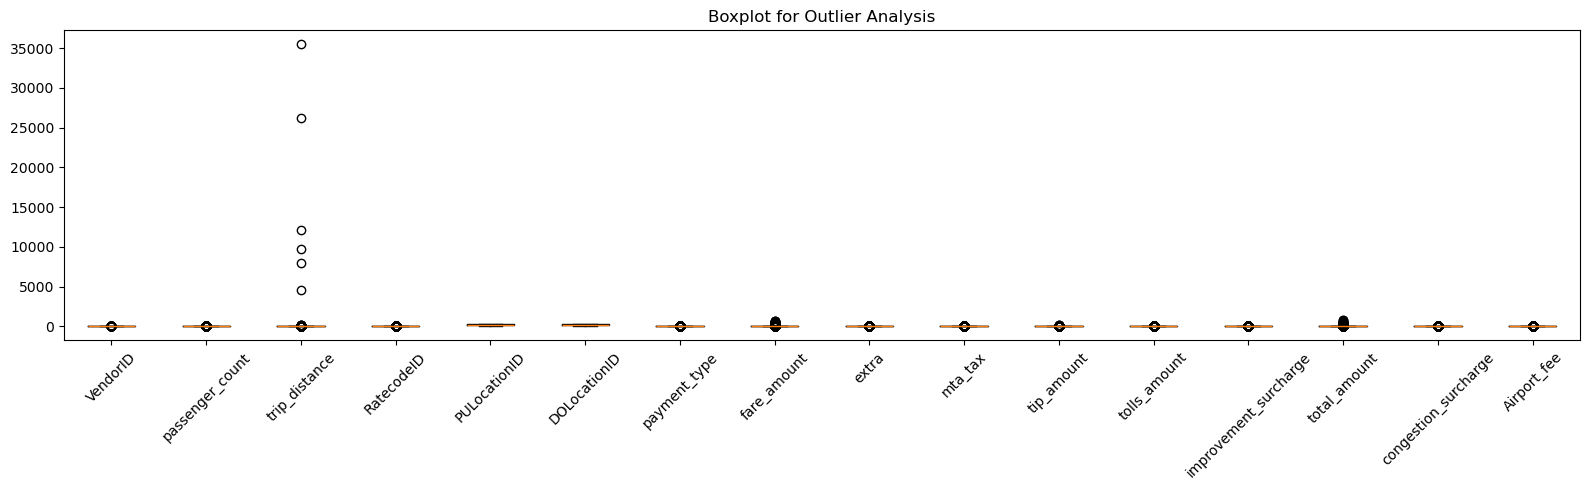

In [512]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

number_cols = df.select_dtypes(include=['number'])
Q1 = number_cols.quantile(0.25)
Q3 = number_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((number_cols < (Q1 - 1.5 * IQR)) | (number_cols > (Q3 + 1.5 * IQR))).sum()
print("Potential outliers in each column:\n", outliers)

plt.figure(figsize=(len(number_cols.columns.values), 5))
plt.boxplot(df[number_cols.columns.values].values, tick_labels=number_cols.columns.values, vert=True)

plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Analysis")
plt.tight_layout()

plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [514]:
# remove passenger_count > 6
df = df[df["passenger_count"]<=6]

In [516]:
df[~(df.trip_distance >250)].shape

(295281, 18)

In [518]:
# Continue with outlier handling

# First check count for trip_distance and fare amount
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))].shape
# As only 5 such records are available, we can delete them
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Count for Valuesof distance and amount are zero but dropoff zones are different 
df[(df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID)].shape
# Dropping as only 9 such rows available
df = df[~((df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))]

# Check the count for trip distance greater than 250 miles
df[(df.trip_distance >250)].shape
# As count is 9, we can delete it
df=df[~(df.trip_distance >250)]

# Analyse the payment type zero values
df.payment_type.value_counts(dropna=False)
# As ~10k records have 0 payment values, so instead of delete lets assign it with mode value
df['payment_type'].replace(0, df['payment_type'].mode()[0], inplace=True)

In [ ]:
# Do any columns need standardising?

# Can't standardise the fields at the moment as not sure of the use cases, but the below fields might cause the issue in the future, will standardise as and when required. 

# fare_amount Range: 0 to ~600 Median is less than 14

# trip_distance - Range: 0 to ~110 miles Median is less than 2

# tip_amount Range: 0 to ~250 Median is less than 3


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [520]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Categorise the varaibles into Numerical or Categorical.
* `VendorID`:              Categorical
* `tpep_pickup_datetime`:  Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`:       Numerical
* `trip_distance`:         Numerical
* `RatecodeID`:            Categorical
* `PULocationID`:          Categorical
* `DOLocationID`:          Categorical
* `payment_type`:          Categorical
* `pickup_hour`:           Numerical
* `trip_duration`:         Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Numerical it is

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

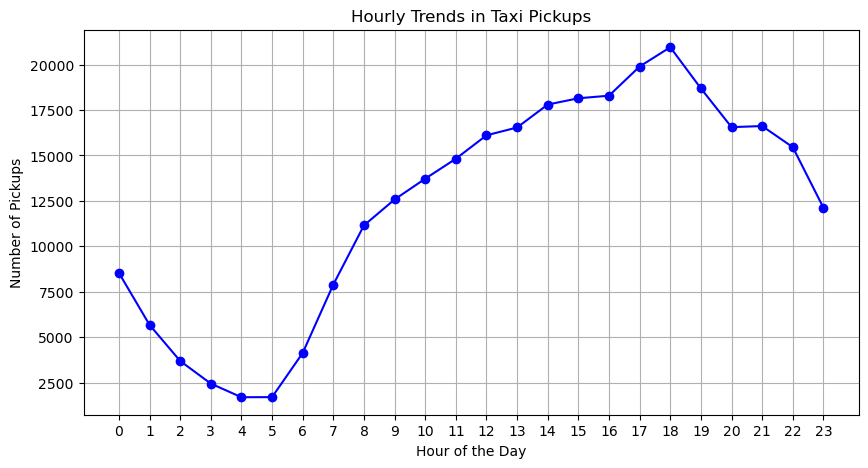

In [522]:
# Find and show the hourly trends in taxi pickups
# Calculating Hour from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Counting number of pickups per hour
hourly_trends = df['pickup_hour'].value_counts().sort_index()

# Visualising Trend using line chart
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid(True)
plt.show()



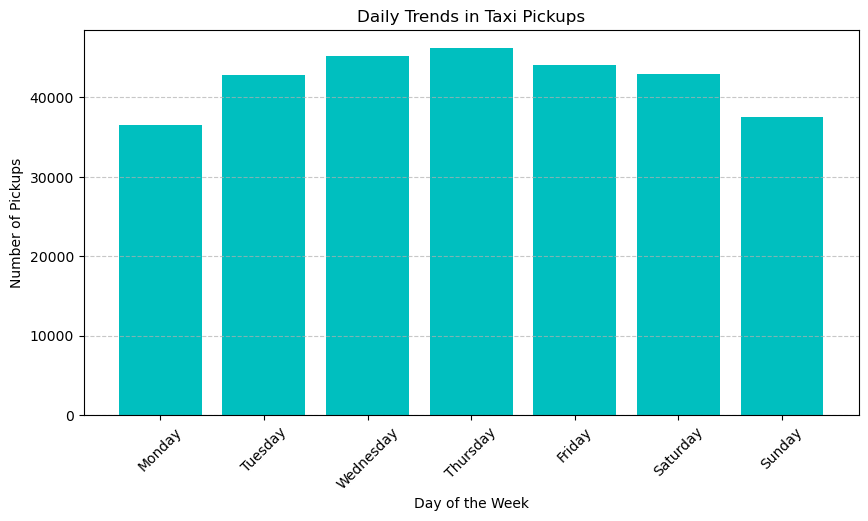

In [524]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()

#Counting pickups per day
daily_trends = df['pickup_day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

#Visualising the data
plt.figure(figsize=(10, 5))
plt.bar(daily_trends.index, daily_trends.values, color='c')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

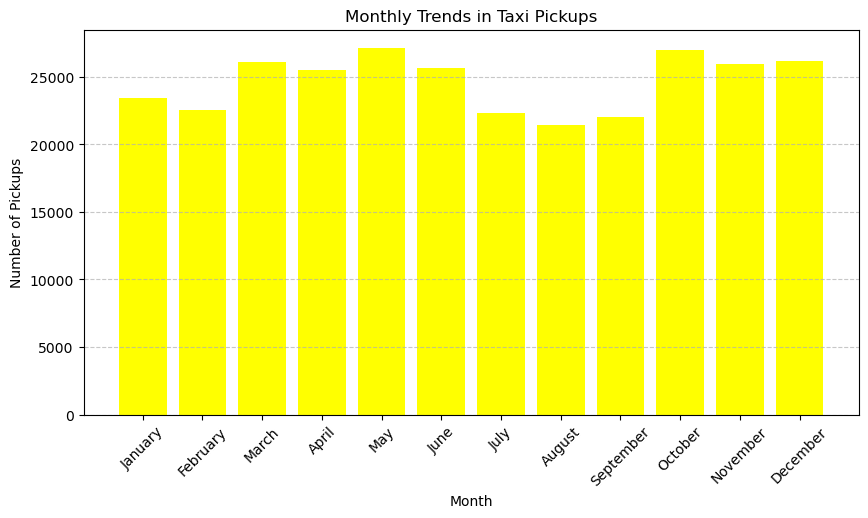

In [526]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%B')

#Counting pickups per month
monthly_trends = df['pickup_month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

#Visualising the data
plt.figure(figsize=(10, 5))
plt.bar(monthly_trends.index, monthly_trends.values, color='yellow')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [528]:
# Analyse the above parameters
finance_col = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in finance_col:
    zero_values = (df[col] == 0).sum()
    negative_values = (df[col] < 0).sum()
    print(f"{col}: {zero_values} zero values, and {negative_values} negative values")



fare_amount: 73 zero values, and 0 negative values
tip_amount: 67776 zero values, and 0 negative values
total_amount: 35 zero values, and 0 negative values
trip_distance: 5772 zero values, and 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
# Tip Amount has big amount of zero values so we can't discard that records.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [530]:
# Create a df with non zero entries for the selected parameters.
# Removing only fare_amount and total_amount zero values as other have large amount of non zero values
df_copy = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0)].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295194 entries, 0 to 299999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               295194 non-null  int64         
 1   tpep_pickup_datetime   295194 non-null  datetime64[us]
 2   tpep_dropoff_datetime  295194 non-null  datetime64[us]
 3   passenger_count        295194 non-null  float64       
 4   trip_distance          295194 non-null  float64       
 5   RatecodeID             295194 non-null  float64       
 6   PULocationID           295194 non-null  int64         
 7   DOLocationID           295194 non-null  int64         
 8   payment_type           295194 non-null  int64         
 9   fare_amount            295194 non-null  float64       
 10  extra                  295194 non-null  float64       
 11  mta_tax                295194 non-null  float64       
 12  tip_amount             295194 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

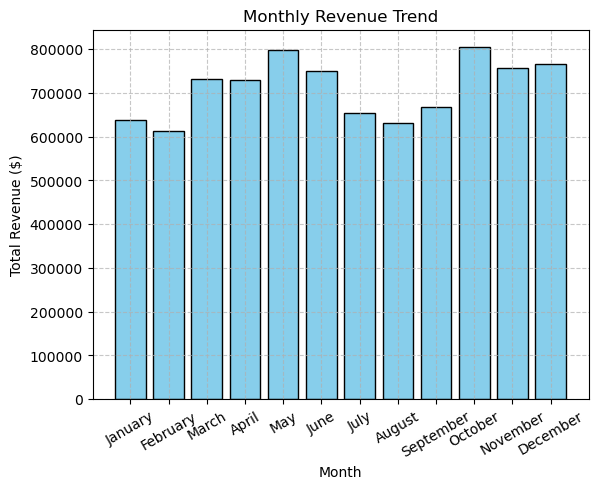

In [532]:
# Group data by month and analyse monthly revenue
df_copy['month'] = df_copy['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df_copy.groupby('month')['total_amount'].sum().reset_index(name='monthly_revenue')

monthly_revenue = monthly_revenue.set_index('month').loc[["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]].reset_index()


plt.bar(monthly_revenue['month'], monthly_revenue['monthly_revenue'], color="skyblue", edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=30)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Monthly Revenue Trend")
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

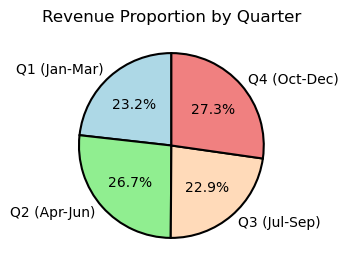

In [534]:
# Calculate proportion of each quarter

df_copy['quarter'] = df_copy['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df_copy.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

plt.figure(figsize=(3 , 3))
plt.pie(quarterly_revenue['proportion'],
    labels=["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"], 
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightblue", "lightgreen", "peachpuff", "lightcoral"],
    wedgeprops={"edgecolor": "black", "linewidth": 1.5})

plt.title('Revenue Proportion by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

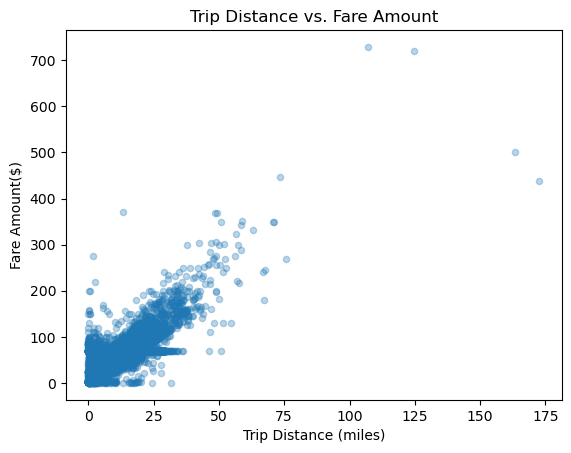

0.9437461754996052


In [536]:
# Show how trip fare is affected by distance

df_copy = df[df['trip_distance'] > 0]

df_copy.plot.scatter(x='trip_distance', y='fare_amount', alpha=0.3)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount($)')
plt.show()
corr_value = df_copy['trip_distance'].corr(df_copy['fare_amount'])
# Positive correlation
print(corr_value)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295267 entries, 0 to 299999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               295267 non-null  int64         
 1   tpep_pickup_datetime   295267 non-null  datetime64[us]
 2   tpep_dropoff_datetime  295267 non-null  datetime64[us]
 3   passenger_count        295267 non-null  float64       
 4   trip_distance          295267 non-null  float64       
 5   RatecodeID             295267 non-null  float64       
 6   PULocationID           295267 non-null  int64         
 7   DOLocationID           295267 non-null  int64         
 8   payment_type           295267 non-null  int64         
 9   fare_amount            295267 non-null  float64       
 10  extra                  295267 non-null  float64       
 11  mta_tax                295267 non-null  float64       
 12  tip_amount             295267 non-null  float64  


Correlation between fare_amount & trip_duration: 0.2729529677660761



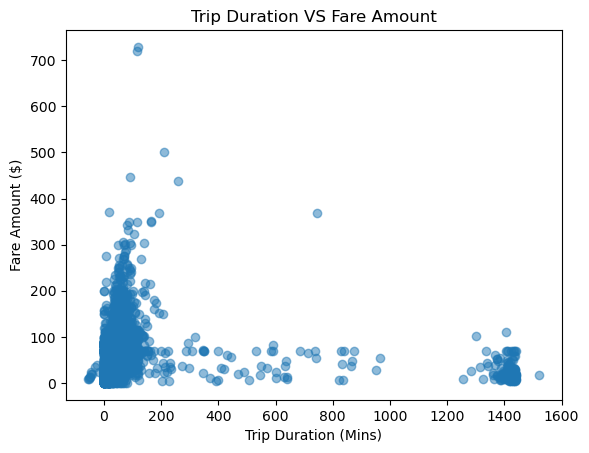

In [540]:
# Show relationship between fare and trip duration
df_copy["trip_duration"] = (df_copy["tpep_dropoff_datetime"] - df_copy["tpep_pickup_datetime"]).dt.total_seconds() / 60
correlation = df_copy["trip_duration"].corr(df_copy["fare_amount"])
print(f"\nCorrelation between fare_amount & trip_duration: {correlation}\n")

plt.scatter(df_copy["trip_duration"], df_copy["fare_amount"], alpha=0.5)
plt.xlabel("Trip Duration (Mins)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Duration VS Fare Amount")

plt.show()

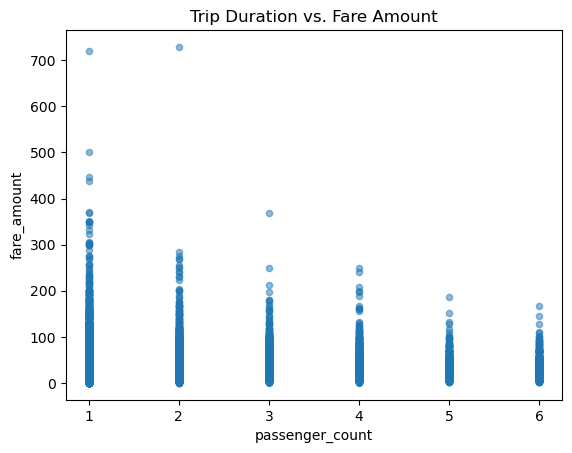

Correlation between fare amount and passenger count : 0.03951819620842217


In [542]:
# Show relationship between fare and number of passengers

df_copy.plot.scatter(x='passenger_count', y='fare_amount', alpha=0.5)
plt.title("Trip Duration vs. Fare Amount")
plt.show()

corr_val = df_copy['passenger_count'].corr(df_copy['fare_amount'])
print("Correlation between fare amount and passenger count :", corr_val)
#No strong correlation

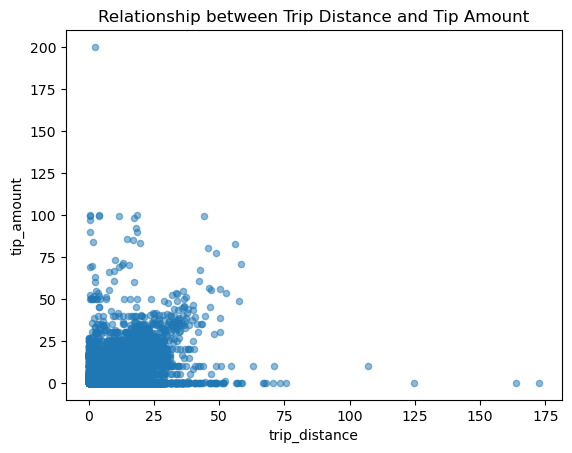

0.5816276977726774


In [544]:
# Show relationship between tip and trip distance

df_copy.plot.scatter(x='trip_distance', y='tip_amount', alpha=0.5)
plt.title("Relationship between Trip Distance and Tip Amount")
plt.show()

corr_value = df_copy['trip_distance'].corr(df_copy['tip_amount'])
#Low Positive correlation
print(corr_value)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

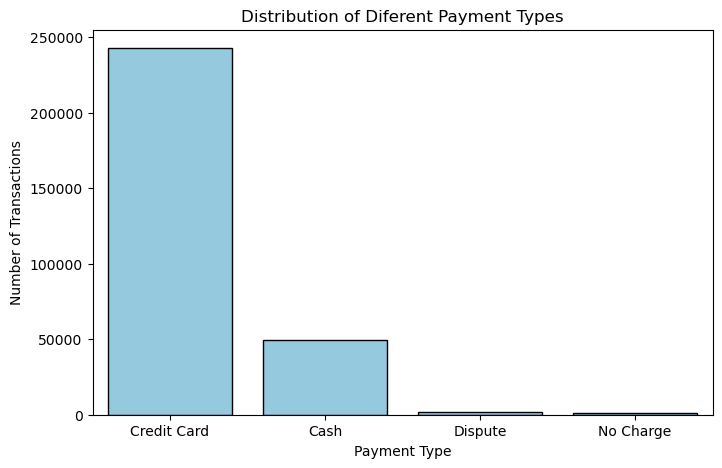

In [546]:
# Analyse the distribution of different payment types (payment_type).

# Count the payment type occurences
payment_counts = df["payment_type"].value_counts()

# Define the labels of payment type
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Map the labels to index
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, color="skyblue", edgecolor="black")

plt.ylabel("Number of Transactions")
plt.xlabel("Payment Type")
plt.title("Distribution of Diferent Payment Types")

# Show plot
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [548]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [550]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

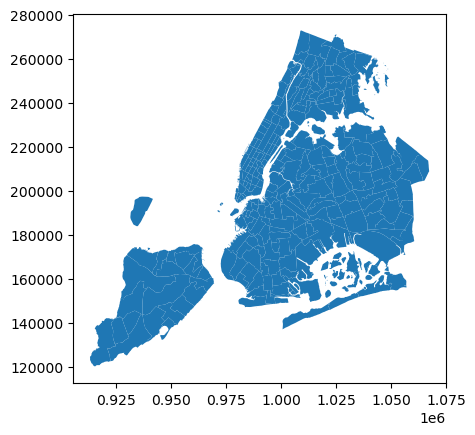

In [552]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [554]:
# Merge zones and trip records using locationID and PULocationID

df_copy = df_copy.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [556]:
# Group data by location and calculate the number of trips

loc_trip_counts = df_copy.groupby('PULocationID').size().reset_index(name='trip_count')

loc_trip_counts.sort_values(by='trip_count', ascending=False).head(5)


PULocationID  trip_count
114           132       14829
211           237       13578
142           161       13354
210           236       12126
143           162       10272

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [558]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(loc_trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0         5.0  
1           NaN         0.0  
2           3.0         8.0  
3           4.0       334.0  
4           5.0         2.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

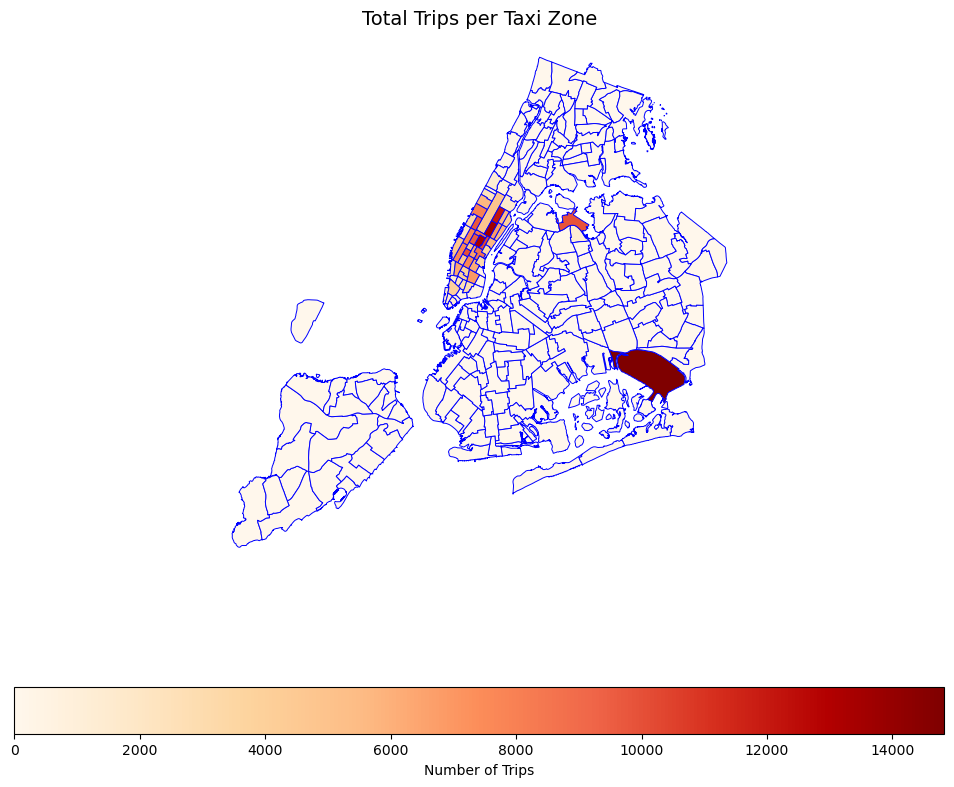

In [560]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the map and display it
zones.plot(column='trip_count', cmap='OrRd', linewidth=0.7, edgecolor='blue', legend = True, ax=ax, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})

ax.set_title("Total Trips per Taxi Zone", fontsize=14)
ax.axis("off")
plt.show()


In [562]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by number of trips in descending order
sort_zones = zones.sort_values(by='trip_count', ascending=False)

# Display the top 10 zones
sort_zones[['zone', 'borough', 'trip_count']].head(10)

zone    borough  trip_count
131                   JFK Airport     Queens     14829.0
236         Upper East Side South  Manhattan     13578.0
160                Midtown Center  Manhattan     13354.0
235         Upper East Side North  Manhattan     12126.0
161                  Midtown East  Manhattan     10272.0
185  Penn Station/Madison Sq West  Manhattan     10027.0
137             LaGuardia Airport     Queens      9899.0
141           Lincoln Square East  Manhattan      9698.0
229     Times Sq/Theatre District  Manhattan      9623.0
169                   Murray Hill  Manhattan      8632.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

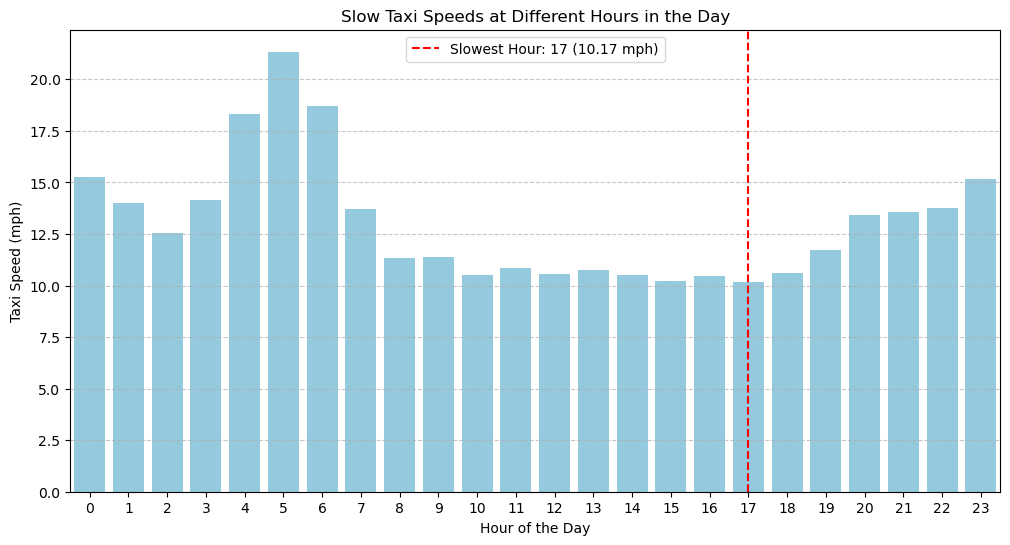

In [564]:
# Find routes which have the slowest speeds at different times of the day
# Calculating the trip duration in hours
df["trip_duration_hours"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# Group by pickup hour and calculate average speed
speed_per_hour = df.groupby("pickup_hour").apply(lambda x: (x["trip_distance"].sum() / x["trip_duration_hours"].sum()))

# Sort speeds to find the slowest hours
slowest_hours = speed_per_hour.sort_values(ascending=True)

# Find the slowest hour
slowest_hour = slowest_hours.idxmin()
slowest_speed = slowest_hours.min()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=slowest_hours.index, y=slowest_hours.values, color="skyblue")

# Highlighting the slowest hour
plt.axvline(x=slowest_hour, color='red', linestyle='--', label=f'Slowest Hour: {slowest_hour} ({slowest_speed:.2f} mph)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Taxi Speed (mph)")
plt.title("Slow Taxi Speeds at Different Hours in the Day")
plt.xticks(range(24))  # Show all hours
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

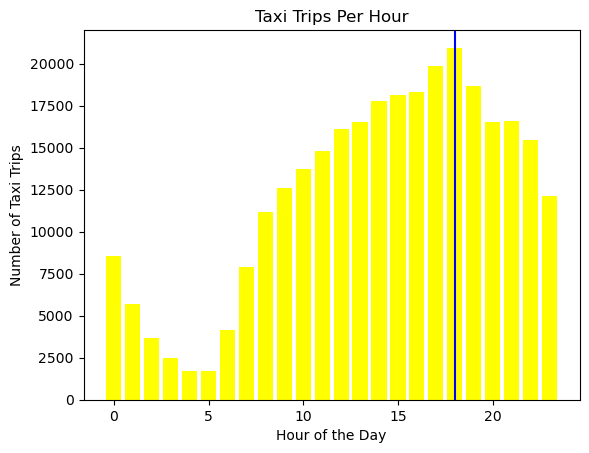

Most busiest hour is 18 with 20950 trips.


In [566]:
# Visualise the number of trips per hour and find the busiest hour

trip_per_hour = df['pickup_hour'].value_counts().sort_index()

busy_hour = trip_per_hour.idxmax()
busy_trips = trip_per_hour.max()

plt.bar(trip_per_hour.index, trip_per_hour.values, color='yellow')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Trips')
plt.title('Taxi Trips Per Hour')
plt.axvline(busy_hour, color='blue')
plt.show()

print(f"Most busiest hour is {busy_hour} with {busy_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [568]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Scale up the trip counts
scaled_trip_counts = df.groupby('pickup_hour')['VendorID'].count() / sample_fraction

# Convert to DataFrame for better visualization
scaled_trip_counts = scaled_trip_counts.reset_index()
scaled_trip_counts.columns = ['pickup_hour', 'scaled_trip_count']

# Display the top 5 busiest hours
scaled_trip_counts.sort_values(by='scaled_trip_count', ascending=False).head(5)

pickup_hour  scaled_trip_count
18           18           419000.0
17           17           397780.0
19           19           373700.0
16           16           365700.0
15           15           362860.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

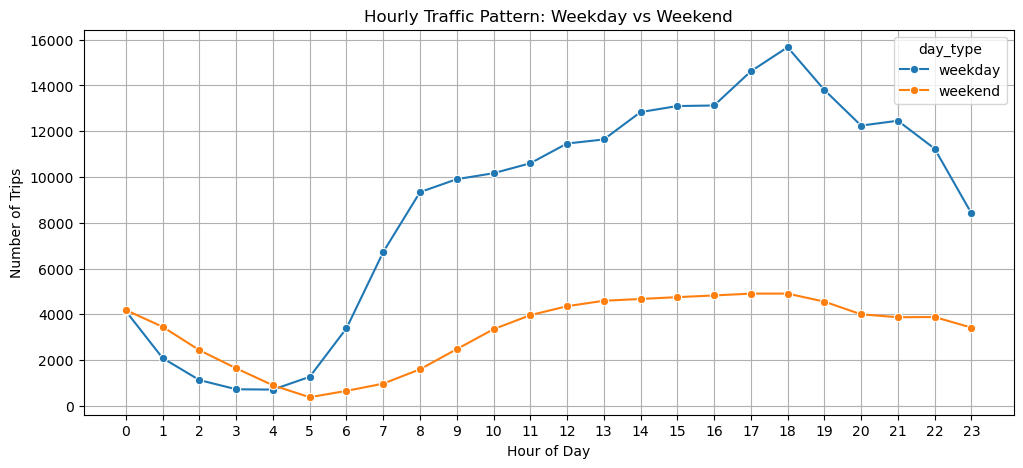

In [570]:
# Compare traffic trends for the week days and weekends
# STUDENT COMMENT - Adding column "day_type" in operational_efficiency_df to identify if it's a weekday or weekend
df_copy["day_type"] = (df_copy["pickup_day_name"]
                                         .apply(lambda x: "weekend" if x in ("Saturday", "Sunday") else "weekday"))

# STUDENT COMMENT - Calculating hourly traffic for weekdays & weekends
day_type_hourly_traffic_df = (df_copy.groupby(by=["pickup_hour", "day_type"])["trip_duration"]
                              .count().reset_index(name="trip_count"))

# STUDENT COMMENT - Using line plot so we can easily see the hourly traffic trend on weekdays & weekends
plt.figure(figsize=(12,5))
sns.lineplot(data=day_type_hourly_traffic_df, x="pickup_hour", y="trip_count", hue="day_type", marker="o")
plt.title("Hourly Traffic Pattern: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(True)

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [572]:
df_copy.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-04-21 14:27:29   2023-04-21 14:31:29              1.0   
1         2  2023-01-10 09:36:36   2023-01-10 09:44:45              1.0   
2         2  2023-02-04 20:07:56   2023-02-04 20:17:06              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.50         1.0            79           107             2   
1           1.59         1.0           137           229             2   
2           1.04         1.0           224            79             1   
3           2.57         1.0           186           239             1   
4           1.74         1.0           142           237             1   

   fare_amount  ...  pickup_month_name  trip_duration  OBJECTID  Shape_Leng  \
0          5.8  ...              April       4.000000      79.0    0.042625   
1         10.0  ...            January       8.150000     137.0    0.046108   
2         10.0  ...           February       9.166667     224.0    0.044020   
3         23.3  ...              March      26.133333     186.0    0.024696   
4         11.4  ...          September       9.266667     142.0    0.038176   

   Shape_Area                            zone  LocationID    borough  \
0    0.000108                    East Village        79.0  Manhattan   
1    0.000116                        Kips Bay       137.0  Manhattan   
2    0.000098  Stuy Town/Peter Cooper Village       224.0  Manhattan   
3    0.000037    Penn Station/Madison Sq West       186.0  Manhattan   
4    0.000076             Lincoln Square East       142.0  Manhattan   

                                            geometry  day_type  
0  POLYGON ((988746.067 202151.955, 988733.885 20...   weekday  
1  POLYGON ((991954.728 209026.462, 991949.076 20...   weekday  
2  POLYGON ((991147.703 207200.071, 991189.448 20...   weekend  
3  POLYGON ((986752.603 210853.699, 986627.863 21...   weekday  
4  POLYGON ((989380.305 218980.247, 989359.803 21...   weekday  

[5 rows x 32 columns]

In [576]:
# Find top 10 pickup and dropoff zones
# Calculating the hourly pickup count for each PULocationID
zone_wise_hourly_pickups = (df_copy.groupby(by=["PULocationID", "pickup_hour"])["trip_duration"]
                        .count().reset_index(name="trip_count"))

# Sorting the zonal wise hourly pickups in descending order
top_hourly_pickups = zone_wise_hourly_pickups.sort_values(by="trip_count", ascending=False)
print("\n Top 10 pickup zones")
print(top_hourly_pickups.head(10))

df_copy["dropoff_hour"] = df_copy["tpep_dropoff_datetime"].dt.hour

# Calculating hourly dropoff count for every DOLocationID
zone_wise_hourly_dropoffs = (df_copy.groupby(by=["DOLocationID", "dropoff_hour"])["trip_duration"]
                         .count().reset_index(name="trip_count"))

# Sorting the zone_wise_hourly_dropoffs in descending order
top_hourly_dropoffs = zone_wise_hourly_dropoffs.sort_values(by="trip_count", ascending=False)
print("\n Top 10 dropoff zones")
print(top_hourly_dropoffs.head(10))


 Top 10 pickup zones
      PULocationID  pickup_hour  trip_count
1848           161           18        1239
1847           161           17        1138
1846           161           16        1063
2769           237           18        1061
1416           132           22        1055
1409           132           15        1042
2766           237           15        1041
2768           237           17        1031
1410           132           16        1008
2742           236           15         998

 Top 10 dropoff zones
      DOLocationID  dropoff_hour  trip_count
4296           236            15        1029
4323           237            18         982
4299           236            18         980
4317           237            12         972
4298           236            17         931
4321           237            16         905
4320           237            15         905
4297           236            16         904
4295           236            14         895
4319           237   

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

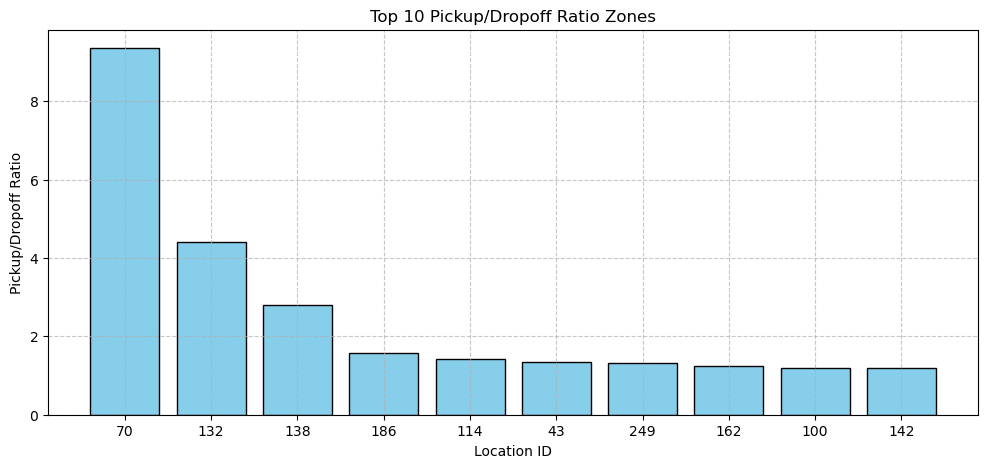

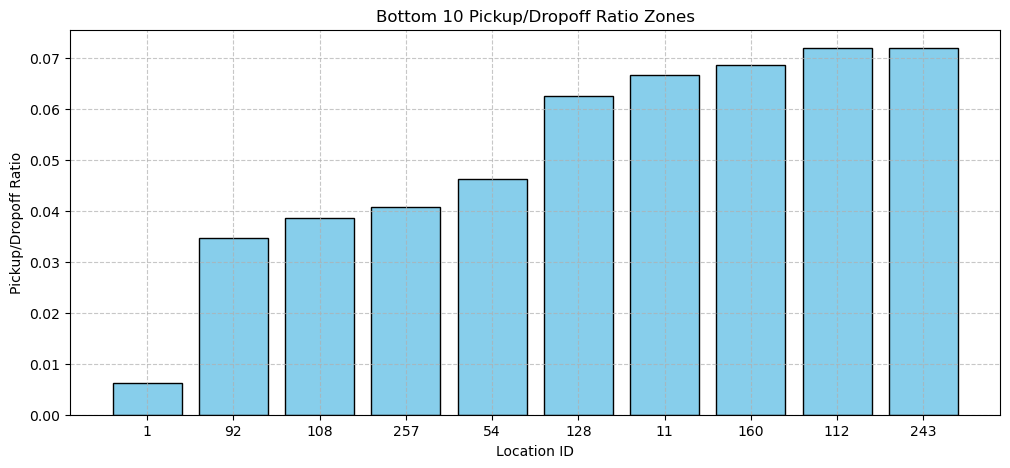

In [582]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculating the total pickups and dropoffs for every PULocationID and DOLocationID respectively.
total_pickup_per_zone = df_copy.groupby("PULocationID")["trip_duration"].count().reset_index(name="pickup_count")
total_dropoff_per_zone = df_copy.groupby("DOLocationID")["trip_duration"].count().reset_index(name="dropoff_count")

# Merging the total pickups per zone and total number of dropoffs per zone to have the pickup and dropoff data together
pickup_dropoff_per_zone = total_pickup_per_zone.merge(total_dropoffs_per_zone, left_on="PULocationID", right_on="DOLocationID", how="inner")

# Calculating the ratio of pickup and dropoff for each zone
pickup_dropoff_per_zone["pickup_dropoff_ratio"] = pickup_dropoff_per_zone["pickup_count"] / pickup_dropoff_per_zone["dropoff_count"]
pickup_dropoff_per_zone.drop(columns="DOLocationID", inplace=True)
pickup_dropoff_per_zone.rename(columns={"PULocationID":"LocationID"}, inplace=True)

# Getting the Top 10 and Bottom 10 ratios
top_10_ratio = pickup_dropoff_per_zone.sort_values(by="pickup_dropoff_ratio", ascending=False).head(10)
top_10_ratio["LocationID"] = top_10_ratio["LocationID"].astype(str)
bottom_10_ratio = pickup_dropoff_per_zone.sort_values(by="pickup_dropoff_ratio", ascending=True).head(10)
bottom_10_ratio["LocationID"] = bottom_10_ratio["LocationID"].astype(str)

# Plotting a bar chart to visualize the Top 10 pickup and dropoff ratios
plt.figure(figsize=(12,5))
plt.bar(top_10_ratio["LocationID"], top_10_ratio["pickup_dropoff_ratio"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Pickup/Dropoff Ratio Zones")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Plotting bar chart to visualize the Bottom 10 pickup and dropoff ratios
plt.figure(figsize=(12,5))
plt.bar(bottom_10_ratio["LocationID"], bottom_10_ratio["pickup_dropoff_ratio"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Location ID")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Pickup/Dropoff Ratio Zones")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

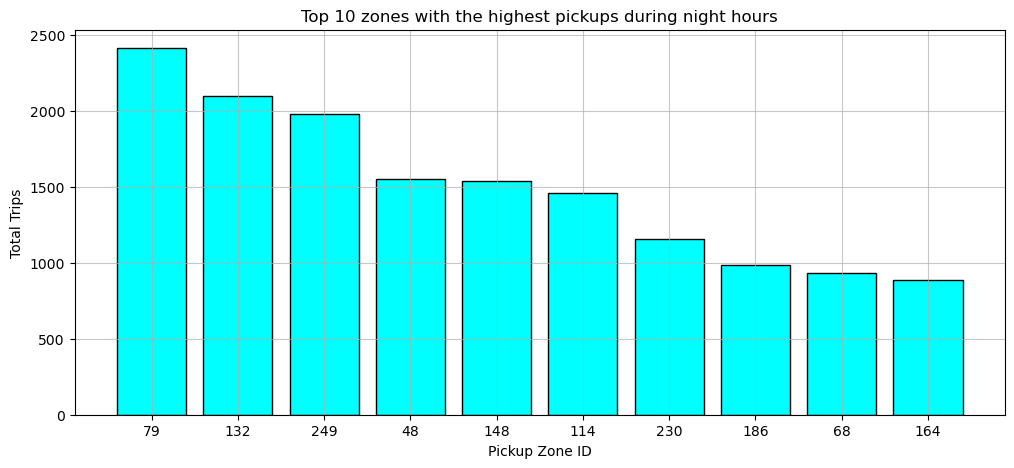

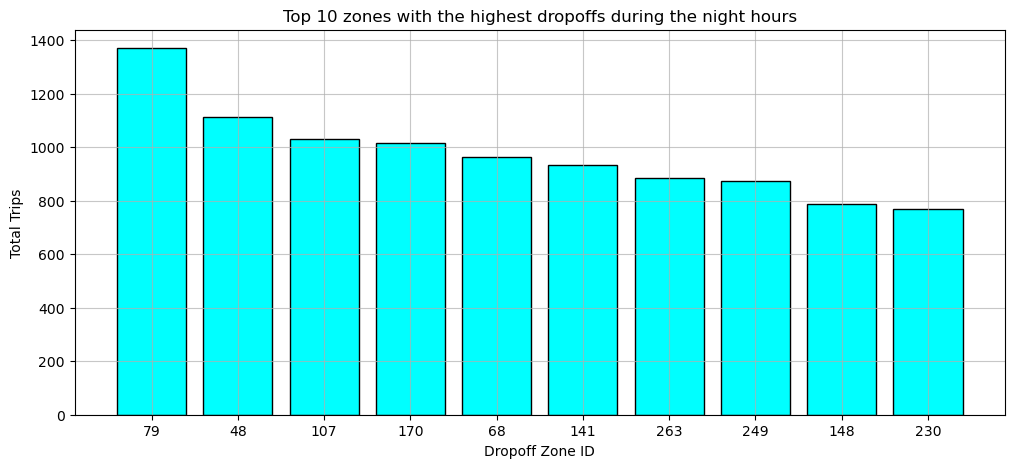

In [586]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Creating 2 new DFs, one for pickups during night hours & other for dropoffs during the night hours
df_night_hours_pickup = df_copy[(df_copy["tpep_pickup_datetime"].dt.time >= pd.to_datetime("23:00").time()) |
                                            (df_copy["tpep_pickup_datetime"].dt.time < pd.to_datetime("05:00").time())]
df_night_hours_dropoff = df_copy[(df_copy["tpep_dropoff_datetime"].dt.time >= pd.to_datetime("23:00").time()) |
                                            (df_copy["tpep_dropoff_datetime"].dt.time < pd.to_datetime("05:00").time())]

# Creating DF for pickups for every zone during night hours
zonal_night_hours_pickups = df_night_hours_pickup.groupby(by=["PULocationID"])["trip_duration"].count().reset_index(name="trip_count")

# Sorting zonal_night_time_pickups in descending order
zonal_night_hours_pickups = zonal_night_hours_pickups.sort_values(by="trip_count", ascending=False).head(10)
zonal_night_hours_pickups["PULocationID"] = zonal_night_hours_pickups["PULocationID"].astype(str)

# Plotting bar chart to visualize Top 10 zones with high pickups during night hours
plt.figure(figsize=(12,5))
plt.bar(zonal_night_hours_pickups["PULocationID"], zonal_night_hours_pickups["trip_count"], color="aqua", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Pickup Zone ID")
plt.ylabel("Total Trips")
plt.title("Top 10 zones with the highest pickups during night hours")
plt.grid(axis="x", alpha=0.7)
plt.grid(axis="y", alpha=0.7)

plt.show()

# Creating DF for dropoffs for every zone during night hours
zonal_night_hours_dropoffs = df_night_hours_dropoff.groupby(by=["DOLocationID"])["trip_duration"].count().reset_index(name="trip_count")

# Sorting zonal_night_time_dropoffs in descending order
zonal_night_hours_dropoffs = zonal_night_hours_dropoffs.sort_values(by="trip_count", ascending=False).head(10)
zonal_night_hours_dropoffs["DOLocationID"] = zonal_night_hours_dropoffs["DOLocationID"].astype(str)

# Plotting bar chart to visualize Top 10 zones with high dropoffs during night hours
plt.figure(figsize=(12,5))
plt.bar(zonal_night_hours_dropoffs["DOLocationID"], zonal_night_hours_dropoffs["trip_count"], color="aqua", edgecolor="black")
plt.xticks(ticks=range(10))
plt.xlabel("Dropoff Zone ID")
plt.ylabel("Total Trips")
plt.title("Top 10 zones with the highest dropoffs during the night hours")
plt.grid(axis="x", alpha=0.7)
plt.grid(axis="y", alpha=0.7)

plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

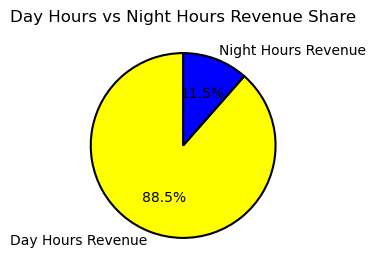

In [588]:
# Filter for night hours (11 PM to 5 AM)

# Creating 2 DFs, one for the trips during night hours and one for the trips during day hours
df_night_hours_trips = df_copy[(df_copy["tpep_pickup_datetime"].dt.time >= pd.to_datetime("23:00").time()) |
                                            (df_copy["tpep_pickup_datetime"].dt.time < pd.to_datetime("05:00").time())]
df_day_hours_trips = df_copy[(df_copy["tpep_pickup_datetime"].dt.time >= pd.to_datetime("05:00").time()) &
                                            (df_copy["tpep_pickup_datetime"].dt.time < pd.to_datetime("23:00").time())]

# Calculating the night hours revenue and day hours revenue
night_hour_revenue = df_night_hours_trips["total_amount"].sum()
day_hour_revenue = df_day_hours_trips["total_amount"].sum()

# Calculating the total revenue, to find out the revenue share of night hours and the day hours
total_revenue = night_hour_revenue + day_hour_revenue
night_share = (night_hour_revenue / total_revenue) * 100
day_share = (day_hour_revenue / total_revenue) * 100

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(
    [day_share, night_share], 
    labels=["Day Hours Revenue", "Night Hours Revenue"], 
    autopct="%1.1f%%",
    startangle=90,
    colors=["yellow", "blue"],
    wedgeprops={"edgecolor": "black", "linewidth": 1.5}
)
ax.set_aspect("equal")
plt.title("Day Hours vs Night Hours Revenue Share")

plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

<function matplotlib.pyplot.show(close=None, block=None)>

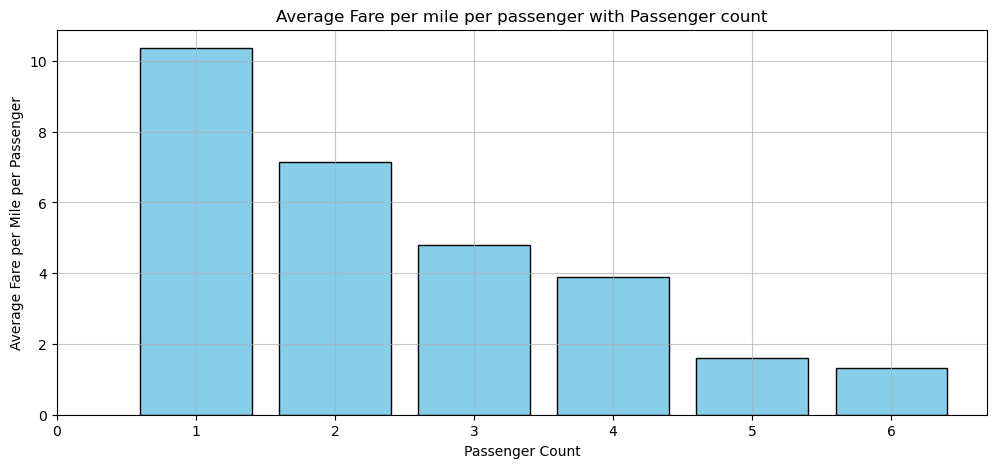

In [590]:
# Analyse the fare per mile per passenger for different passenger counts

valid_trips = df_copy[(df_copy["trip_distance"] > 0) & (df_copy["passenger_count"] > 0)]

valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']

fare_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Plottingthe bar graph to show the variation
plt.figure(figsize=(12,5))
plt.bar(fare_analysis["passenger_count"], fare_analysis["fare_per_mile_per_passenger"], color="skyblue", edgecolor="black")
plt.xticks(ticks=range(7))
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per mile per passenger with Passenger count")
plt.grid(axis="x", alpha=0.7)
plt.grid(axis="y", alpha=0.7)

plt.show


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<function matplotlib.pyplot.show(close=None, block=None)>

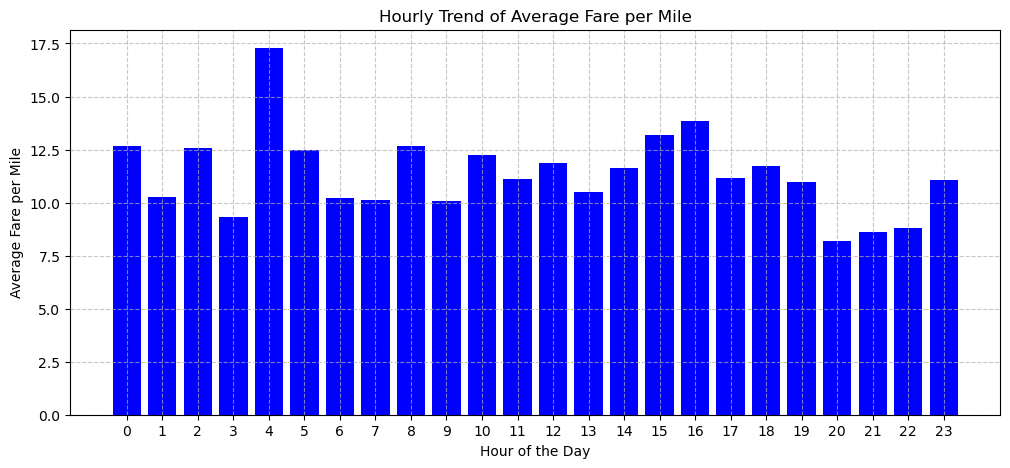

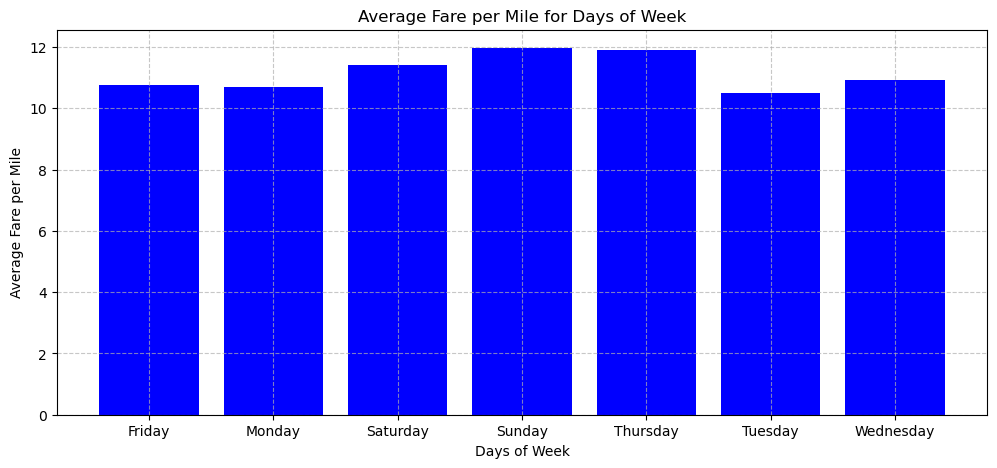

In [592]:
# Compare the average fare per mile for different days and for different times of the day

# Calculating the average fare per mile for valid trips in every hour
hourly_avg_fare_per_mile = (valid_trips.groupby(by="pickup_hour")["fare_per_mile"]
                                             .mean().reset_index(name="hourly_avg_fare_per_mile"))
# Plotting the bar chart to visualize the data for hours of the day
plt.figure(figsize=(12,5))
plt.bar(hourly_avg_fare_per_mile["pickup_hour"], hourly_avg_fare_per_mile["hourly_avg_fare_per_mile"], color="blue")
plt.xticks(ticks=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Hourly Trend of Average Fare per Mile")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

# Calculating the average fare per mile for valid trips in every day of week
avg_fare_per_mile_by_day_of_week = (valid_trips.groupby(by="pickup_day_name")["fare_per_mile"]
                                             .mean().reset_index(name="avg_fare_per_mile_by_day_of_week"))
# Plotting the bar chart to visualize the data for days of week
plt.figure(figsize=(12,5))
plt.bar(avg_fare_per_mile_by_day_of_week["pickup_day_name"], avg_fare_per_mile_by_day_of_week["avg_fare_per_mile_by_day_of_week"], color="blue")
plt.xticks(ticks=range(7))
plt.xlabel("Days of Week")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile for Days of Week")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

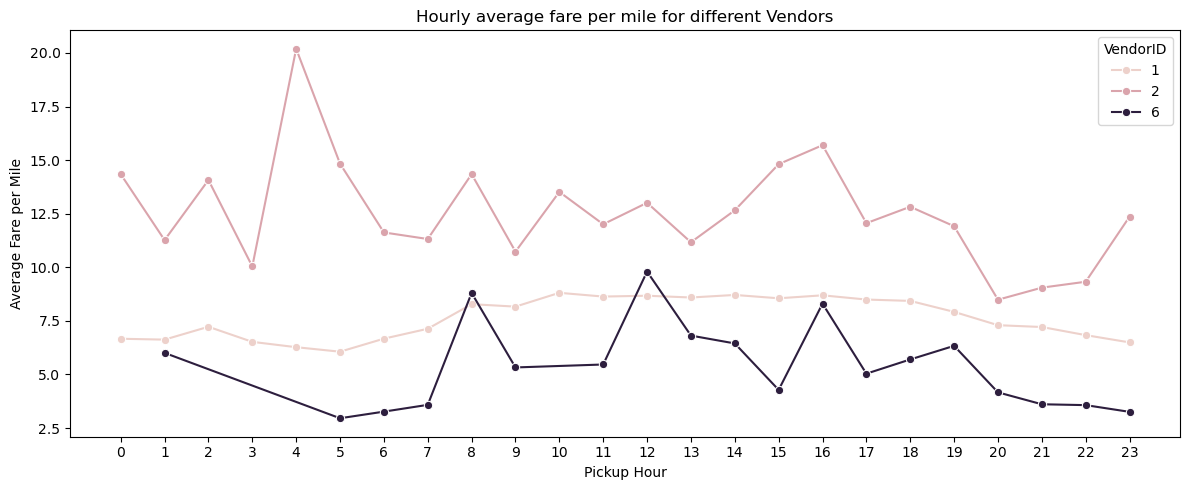

In [594]:
# Compare fare per mile for different vendors
# Calculating the average fare per mile for different hours of the day for every vendor
hourly_vendor_data = (valid_trips.groupby(by=["VendorID", "pickup_hour"])["fare_per_mile"]
                                             .mean().reset_index(name="avg_fare_per_mile_by_vendor_and_hour"))

# Comparing an hourly fare per mile for various vendors using a multiple line plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_vendor_data, x="pickup_hour", y="avg_fare_per_mile_by_vendor_and_hour", 
             hue="VendorID", marker="o")

plt.title("Hourly average fare per mile for different Vendors")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare per Mile")
plt.xticks(range(0, 24))
plt.tight_layout()

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [602]:
valid_trips.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-04-21 14:27:29   2023-04-21 14:31:29              1.0   
1         2  2023-01-10 09:36:36   2023-01-10 09:44:45              1.0   
2         2  2023-02-04 20:07:56   2023-02-04 20:17:06              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.50         1.0            79           107             2   
1           1.59         1.0           137           229             2   
2           1.04         1.0           224            79             1   
3           2.57         1.0           186           239             1   
4           1.74         1.0           142           237             1   

   fare_amount  ...  Shape_Leng  Shape_Area                            zone  \
0          5.8  ...    0.042625    0.000108                    East Village   
1         10.0  ...    0.046108    0.000116                        Kips Bay   
2         10.0  ...    0.044020    0.000098  Stuy Town/Peter Cooper Village   
3         23.3  ...    0.024696    0.000037    Penn Station/Madison Sq West   
4         11.4  ...    0.038176    0.000076             Lincoln Square East   

   LocationID    borough                                           geometry  \
0        79.0  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
1       137.0  Manhattan  POLYGON ((991954.728 209026.462, 991949.076 20...   
2       224.0  Manhattan  POLYGON ((991147.703 207200.071, 991189.448 20...   
3       186.0  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
4       142.0  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   

   day_type  dropoff_hour  fare_per_mile  fare_per_mile_per_passenger  
0   weekday            14      11.600000                    11.600000  
1   weekday             9       6.289308                     6.289308  
2   weekend            20       9.615385                     9.615385  
3   weekday            12       9.066148                     4.533074  
4   weekday            17       6.551724                     6.551724  

[5 rows x 35 columns]

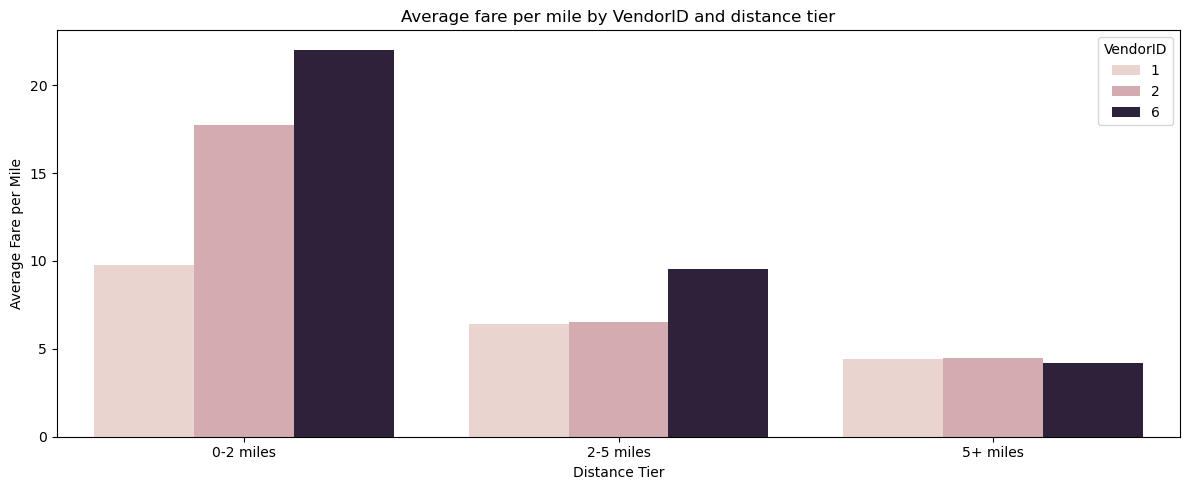

In [604]:
# Defining distance tiers

# Adding the "distance_tier" column for classifying the "trip_distance" in different tiers
valid_trips["distance_tier"] = valid_trips["trip_distance"].apply(
                                         lambda x: "0-2 miles" if x <= 2 else ("2-5 miles" if x <= 5 else "5+ miles"))

# Calculating average fare per mile for all distance tiers for different Vendors
avg_fare_per_mile_by_vendor_and_distance = (valid_trips.groupby(by=["VendorID", "distance_tier"])["fare_per_mile"]
                                             .mean().reset_index(name="avg_fare_per_mile_by_vendor_and_distance"))

# STUDENT COMMENT - Creating grouped bar char to do comparison across vendors
plt.figure(figsize=(12, 5))
sns.barplot(data=avg_fare_per_mile_by_vendor_and_distance,
            x="distance_tier",
            y="avg_fare_per_mile_by_vendor_and_distance",
            hue="VendorID")

plt.title("Average fare per mile by VendorID and distance tier")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile")
plt.tight_layout()

plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [606]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_copy['tip_percent'] = (df_copy['tip_amount'] / df_copy['fare_amount']) * 100

print(df_copy.groupby('trip_distance')['tip_percent'].mean().reset_index())

print(df_copy.groupby('passenger_count')['tip_percent'].mean().reset_index())

print(df_copy.groupby('pickup_hour')['tip_percent'].mean().reset_index())

'''
Passengers tend to tip less on very short rides.
If the fare is low, tips may also be small.
During busy hours, people may be in a hurry and tip less.
Larger groups might tip less per person.
Some riders tip less or not at all when paying by card.
'''

      trip_distance  tip_percent
0              0.01     9.913217
1              0.02     6.456645
2              0.03     6.455935
3              0.04     7.616991
4              0.05     9.001650
...             ...          ...
2938          75.50     0.000000
2939         107.00     1.371930
2940         124.79     0.000000
2941         163.52     0.000000
2942         172.71     0.000000

[2943 rows x 2 columns]
   passenger_count  tip_percent
0              1.0          inf
1              2.0    19.707050
2              3.0    19.248944
3              4.0    17.475061
4              5.0    20.591999
5              6.0    20.292886
    pickup_hour  tip_percent
0             0    20.146860
1             1    19.929804
2             2    20.704758
3             3    20.659387
4             4    18.436006
5             5    17.373919
6             6    18.438917
7             7    19.524188
8             8    19.795828
9             9    19.531868
10           10    19.139122
11     

'\nPassengers tend to tip less on very short rides.\nIf the fare is low, tips may also be small.\nDuring busy hours, people may be in a hurry and tip less.\nLarger groups might tip less per person.\nSome riders tip less or not at all when paying by card.\n'

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [608]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


low_tip_trips = df_copy[df_copy['tip_percent'] < 10]
high_tip_trips = df_copy[df_copy['tip_percent'] > 25]

print(low_tip_trips.groupby('trip_distance')['tip_percent'].mean().reset_index())

print(low_tip_trips.groupby('passenger_count')['tip_percent'].mean().reset_index())

'''
Longer trips tend to get higher tips.
Higher fare rides are associated with better tipping behavior.
More passengers may increase or decrease tipping (depends on group behavior).
'''

      trip_distance  tip_percent
0              0.01     0.142811
1              0.02     0.265055
2              0.03     0.004219
3              0.04     0.000000
4              0.05     0.299925
...             ...          ...
2590          75.50     0.000000
2591         107.00     1.371930
2592         124.79     0.000000
2593         163.52     0.000000
2594         172.71     0.000000

[2595 rows x 2 columns]
   passenger_count  tip_percent
0              1.0     1.160350
1              2.0     0.998550
2              3.0     0.821997
3              4.0     0.630912
4              5.0     1.177086
5              6.0     1.055354


'\nLonger trips tend to get higher tips.\nHigher fare rides are associated with better tipping behavior.\nMore passengers may increase or decrease tipping (depends on group behavior).\n'

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

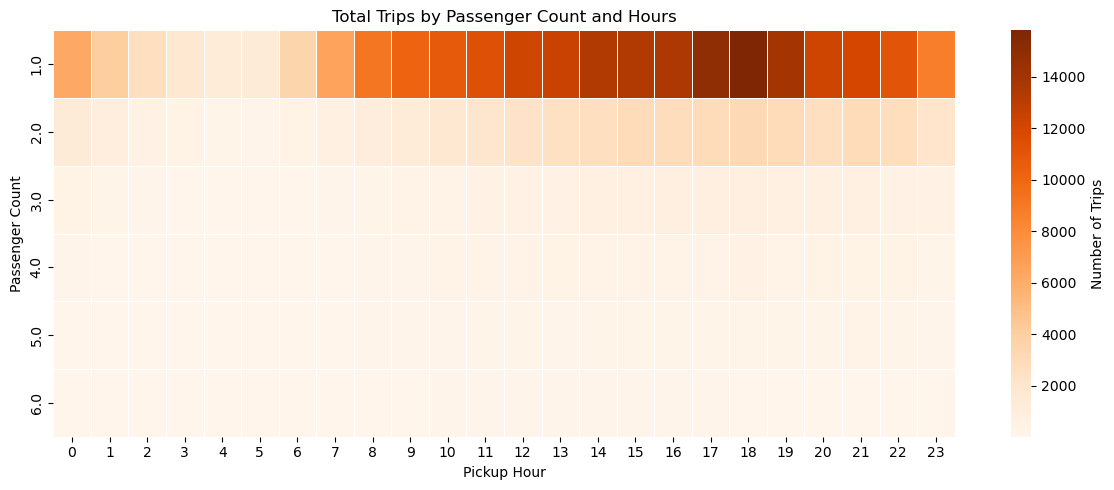

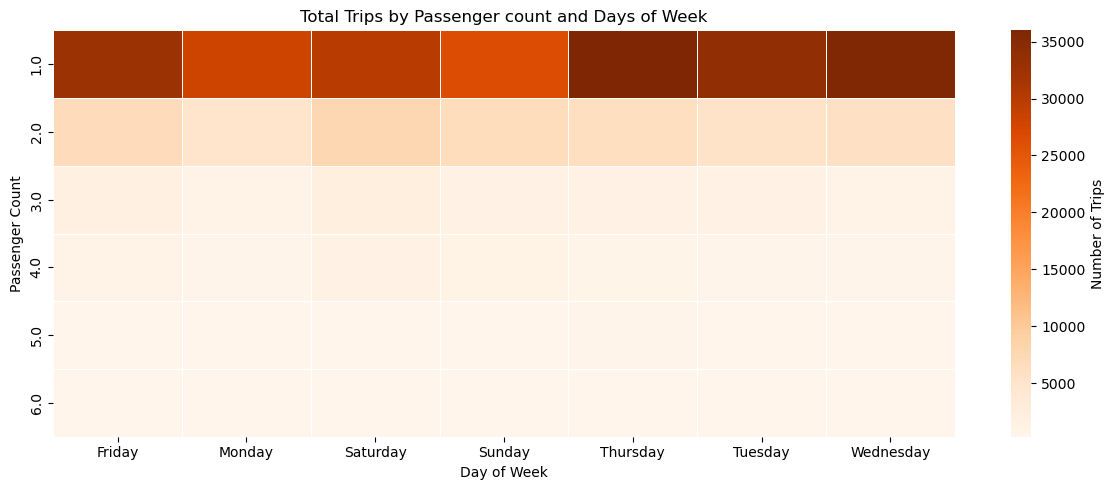

In [610]:
# See how passenger count varies across hours and days

# Calculating trip count for different passenger counts for all hours of the day
passenger_count_across_hours = (df_copy.groupby(by=["passenger_count", "pickup_hour"])["trip_duration"]
                                .count().reset_index(name="count"))

# Creating new DF which can be used to plot a heatmap, as we have 3 variables we need heatmap
heatmap_hour_df = passenger_count_across_hours.pivot(index="passenger_count", columns="pickup_hour", values="count").fillna(0)
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_hour_df, cmap="Oranges", linewidths=0.5, cbar_kws={'label': 'Number of Trips'})
plt.title("Total Trips by Passenger Count and Hours")
plt.xlabel("Pickup Hour")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()

# STUDENT COMMENT - Calculating trip count for different passenger counts for all days of week
passenger_count_across_days = (df_copy.groupby(by=["passenger_count", "pickup_day_name"])["trip_duration"]
                               .count().reset_index(name="count"))

# STUDENT COMMENT - Creating new DF which can be used to plot a heatmap, as we have 3 variables we need heatmap
heatmap_day_df = passenger_count_across_days.pivot(index="passenger_count", columns="pickup_day_name", values="count").fillna(0)
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_day_df, cmap="Oranges", linewidths=0.5, cbar_kws={'label': 'Number of Trips'})
plt.title("Total Trips by Passenger count and Days of Week")
plt.xlabel("Day of Week")
plt.ylabel("Passenger Count")
plt.tight_layout()

plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

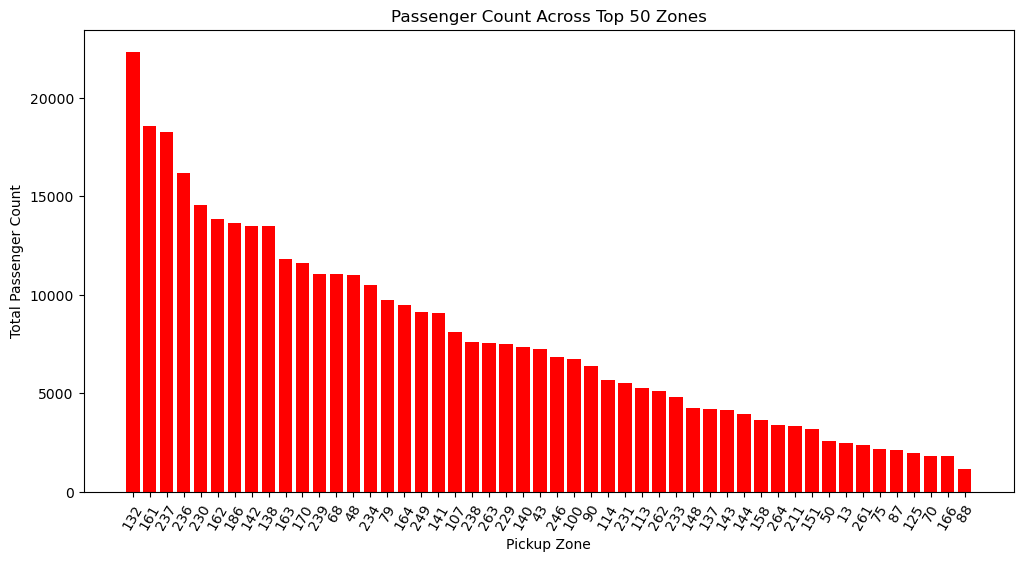

In [614]:
# How does passenger count vary across zones

passenger_by_zone = df_copy.groupby('PULocationID')['passenger_count'].sum().reset_index()

passenger_by_zone_sorted = passenger_by_zone.sort_values(by="passenger_count", ascending=False).head(50)  # Top 50 zones

plt.figure(figsize=(12, 6))
plt.bar(passenger_by_zone_sorted['PULocationID'].astype(str), passenger_by_zone_sorted['passenger_count'], color='red')
plt.xlabel("Pickup Zone")
plt.ylabel("Total Passenger Count")
plt.title("Passenger Count Across Top 50 Zones")
plt.xticks(rotation=60)
plt.show()


In [ ]:
os.getcwd()

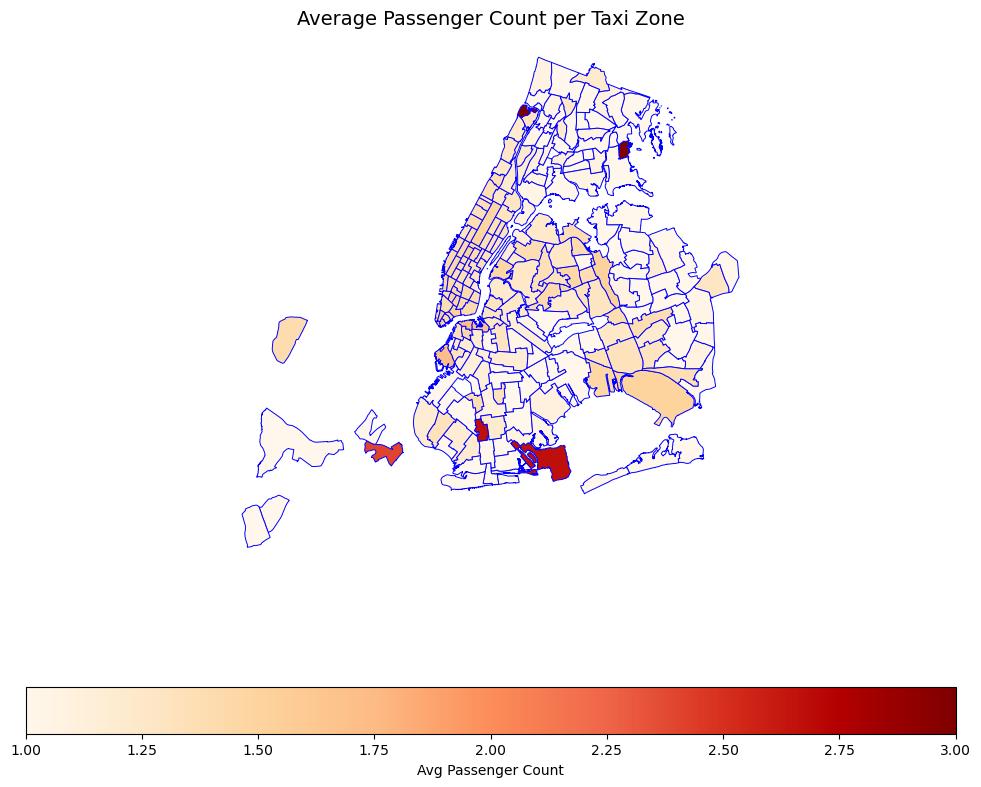

In [618]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df_copy.groupby('PULocationID', as_index=False)['passenger_count'].mean().rename(columns={'passenger_count': 'avg_passenger_count'})

zones_with_trips = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

fig, ax = plt.subplots(figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count', cmap='OrRd', linewidth=0.7, edgecolor='blue',legend=True, ax=ax, legend_kwds={'label': "Avg Passenger Count", 'orientation': "horizontal"})
ax.set_title("Average Passenger Count per Taxi Zone", fontsize=14)
ax.axis("off")
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

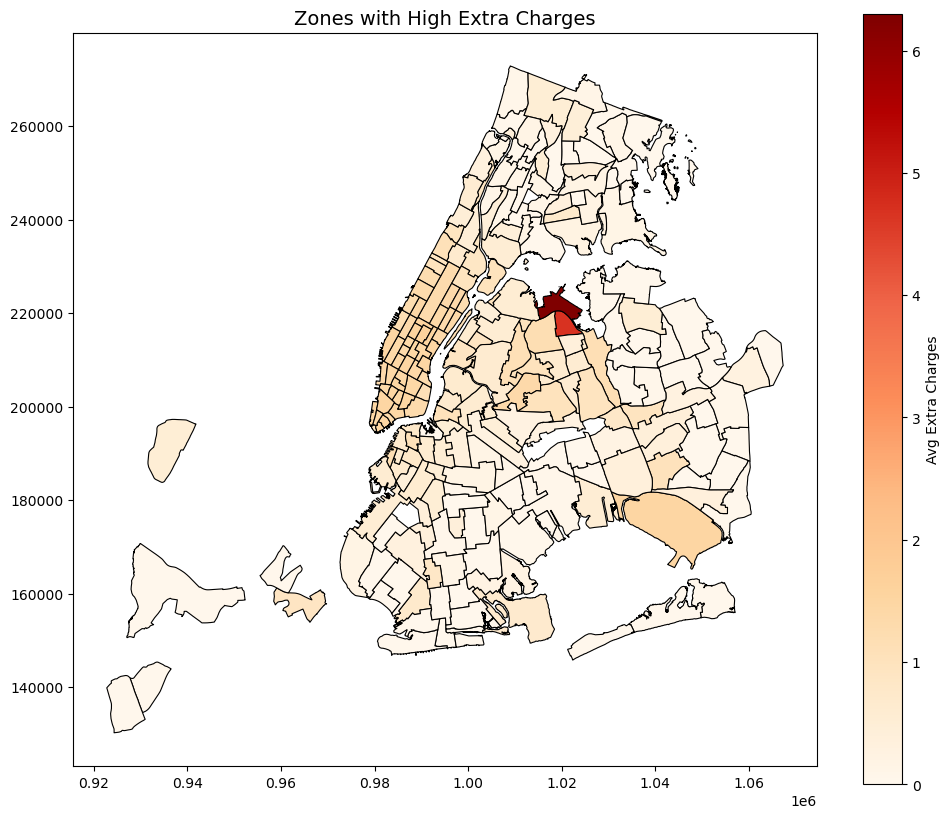

In [624]:
# How often is each surcharge applied?

zone_extra_charges = df_copy.groupby("PULocationID")["extra"].mean().reset_index()

# Merge with taxi_zones GeoDataFrame for mapping
taxi_zones_extra = zones.merge(zone_extra_charges, left_on="LocationID", right_on="PULocationID")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
taxi_zones_extra.plot(column="extra", cmap="OrRd", linewidth=0.8, edgecolor="k",
                      legend=True, legend_kwds={"label": "Avg Extra Charges", "orientation": "vertical"},
                      ax=ax)
ax.set_title("Zones with High Extra Charges", fontsize=14)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Strategies for Enhancing Routing and Dispatching Efficiency
# Based on an analysis of current operations, the following recommendations can help optimize taxi routing and dispatching for improved efficiency and customer satisfaction.

# 1. Demand-Driven Deployment
# Assess daily and hourly demand trends to strategically position taxis.

# Increase vehicle availability in high-demand areas during peak times, such as evenings and weekends.

# Dynamically shift taxis from low-demand zones to areas with higher passenger needs.

# Introduce surge pricing during peak hours to encourage drivers to operate in high-demand locations and maintain supply-demand balance.

# 2. Predictive Routing
# Leverage historical and real-time data to forecast congestion areas and passenger hotspots.

# Continuously optimize routes based on traffic conditions, reducing delays and improving service reliability.

# Deploy a real-time monitoring system to adjust routes as needed.

# Utilize machine learning models to predict traffic flow and travel times, allowing for smarter route suggestions.

# 3. Smart Dispatching
# Assign trips based on demand, distance, and driver availability to minimize passenger wait times.

# Implement a dispatch system that considers real-time traffic data and driver locations for optimal trip assignments.

# Enhance rider-driver matching to ensure quick and efficient pickups.

# 4. Dynamic Pricing Strategies
# Adjust fare rates based on the time of day and demand fluctuations, charging more during peak hours and offering discounts during off-peak periods.

# Lower fares during nighttime to encourage more drivers to operate during these hours.

# 5. Zone-Based Optimization
# Prioritize high-traffic zones, especially during busy periods, to maximize efficiency.

# Identify areas with frequent pickups and drop-offs, ensuring an adequate supply of taxis.

# In low-demand regions, consider incentives or supply adjustments to optimize resource allocation.

# 6. Customer Segmentation
# Analyze passenger trends and tipping behavior to segment customers effectively.

# Tailor dispatch and pricing strategies to cater to different passenger groups for better service customization.

# 7. Vendor Performance Assessment
# Evaluate vendors based on efficiency and fare rates.

# Compare fare-per-mile rates for various trip distances to pinpoint areas for potential cost and service improvements.

# 8. Accounting for External Factors
# Adjust taxi deployment and pricing based on local events, holidays, and other factors influencing travel demand.

# Stay informed about community events and news to proactively manage operational shifts.

# Use weather forecasts to predict demand changes and modify scheduling accordingly.

# By integrating these strategies, taxi services can enhance operational efficiency, better meet passenger needs, boost driver earnings, and improve overall customer experience.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Strategic Cab Positioning Recommendations
# To enhance efficiency and revenue, taxis should be deployed based on demand patterns and real-time data. The following strategies can help optimize cab positioning:

# 1. Time-Sensitive Deployment
# Increase taxi availability in high-demand areas during peak hours (evenings, weekends) to meet passenger needs.

# Position more cabs in key nighttime pickup and drop-off locations between 11 PM and 5 AM.

# Reduce cab supply in low-demand areas during off-peak hours to improve resource efficiency.

# 2. Adjustments by Day of the Week
# Analyze fare trends by day to determine when demand and earnings are highest.

# Deploy additional cabs on high-demand days, such as Fridays and Saturdays, to accommodate increased passenger volume.

# 3. Zone-Based Strategy
# Prioritize deployment in high-traffic areas, particularly during peak travel times.

# Maintain adequate cab supply in locations with high passenger counts and generous tipping behavior to maximize driver earnings.

# 4. Distance-Based Deployment
# Assess fare-per-mile data across different trip lengths.

# Strategically position cabs in areas with a high frequency of long-distance trips (over 5 miles) to optimize revenue potential.

# 5. Real-Time Demand Adjustments
# Utilize predictive analytics and real-time data to anticipate demand shifts caused by events, weather, or other external factors.

# Dynamically reposition cabs in response to sudden surges in trip requests.

# 6. Vendor-Specific Deployment
# Compare fare-per-mile efficiency among vendors to determine their strengths.

# Assign high-performing vendors to areas where they are most competitive and preferred by customers.

# 7. Optimizing Surge Pricing
# Apply surge pricing in high-demand zones, during peak hours, and on high-traffic days.

# Use dynamic pricing to encourage more drivers to operate during busy periods, ensuring a balanced supply-demand ratio.

# 8. Factoring in Extra Charges
# Identify zones and times where additional fees, such as congestion or late-night surcharges, are common.

# Adjust pricing strategies and ensure drivers are aware of these patterns to optimize earnings.

# Maintain sufficient cab availability in areas where extra charges are frequent to prevent long wait times for passengers.

# Implementation Plan
# Integrate these strategies into the cab dispatch system.

# Leverage real-time data to monitor demand and adjust vehicle distribution dynamically.

# Regularly evaluate and refine positioning strategies based on updated insights.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Optimizing Pricing Strategies
# To enhance revenue while maintaining customer affordability, pricing adjustments should be strategically implemented based on demand, distance, location, and competition.

# 1. Time-Based Pricing
# Apply dynamic pricing that varies by time of day and day of the week.

# Increase fares during peak demand periods (evenings, Fridays, and Saturdays) and lower them during off-peak hours to attract more riders.

# Utilize data on fare trends by hour and day to fine-tune price changes for different time slots.

# 2. Distance-Based Pricing
# Optimize fare structures for different trip lengths based on a detailed analysis of distance-based fare trends.

# Set competitive prices for short trips (0-2 miles) to encourage frequent ridership, while evaluating the feasibility of slightly higher rates for longer trips (5+ miles) to maximize revenue.

# 3. Zone-Specific Pricing
# Introduce pricing adjustments based on geographic demand patterns.

# Apply moderate surcharges in high-demand zones where average fares per mile are higher.

# Offer discounts in low-demand areas to stimulate ridership and encourage driver availability.

# Use data-driven insights from passenger volume maps to pinpoint areas for pricing modifications.

# 4. Adjustments Based on Passenger Count
# Assess how pricing correlates with group size using fare data analysis.

# If per-passenger revenue is lower for larger groups, consider slight fare increases while remaining competitive.

# Balance pricing adjustments to ensure affordability while optimizing earnings.

# 5. Competitive Vendor Pricing
# Compare fare structures across different vendors to maintain competitiveness.

# If a vendor consistently underprices rides, explore opportunities to adjust rates without reducing market share.

# Align pricing strategies with competitor trends to maximize profitability while keeping fares attractive to passengers.

# 6. Evaluating Extra Charges
# Identify zones and time periods where additional charges (e.g., surcharges, congestion fees) are common.

# Assess whether these fees can be adjusted without negatively impacting ridership.

# Compare with competitor pricing to ensure extra charges remain reasonable while maximizing revenue potential.

# Implementation Plan
# Develop a flexible pricing model that incorporates these adjustments.

# Continuously monitor market trends and adjust fares accordingly.

# Conduct A/B testing on different pricing structures to gather data-driven insights.

# Evaluate the impact of price changes on key metrics such as total revenue, ridership, and driver earnings to ensure sustainable growth.

